## Clustering Universities based on their features using K-Means

K-Means Lab

In this lab you will attempt to cluster the dataset into two groups: Private and Public.

The labels of the dataset are provided for evaluation purposes only and they should not be used in the clustering process since K-means is an unsupervised learning algorithm.

The Dataset¶

We will use a data frame with 777 observations on the following 18 variables.

· Private A factor with levels No and Yes indicating private or public university

· Apps Number of applications received

· Accept Number of applications accepted

· Enroll Number of new students enrolled

· Top10perc Pct. new students from top 10% of H.S. class

· Top25perc Pct. new students from top 25% of H.S. class

· F.Undergrad Number of fulltime undergraduates

· P.Undergrad Number of parttime undergraduates

· Outstate Out-of-state tuition

· Room.Board Room and board costs

· Books Estimated book costs

· Personal Estimated personal spending

· PhD Pct. of faculty with Ph.D.’s

· Terminal Pct. of faculty with terminal degree

· S.F.Ratio Student/faculty ratio

· perc.alumni Pct. alumni who donate

· Expend Instructional expenditure per student

· Grad.Rate Graduation rate

TASKS

a) Import the needed Libraries

b) Load the dataset

c) Do an initial data analysis

d) Plot Room.Board vs Grad.Rate and Outstate vs F.Undergrad. Do you see any outlier? If so, correct it.

e) Create an instance of a K-means model with 2 clusters

f) Fit the model to all the data except for Private column

g) Evaluate the results: Create a confusion matrix and a report to see how well K-means clustering worked

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('University_Data.csv', index_col=0)

In [ ]:
print(df.head())

                             Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Ch

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [ ]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<Axes: xlabel='Private', ylabel='count'>

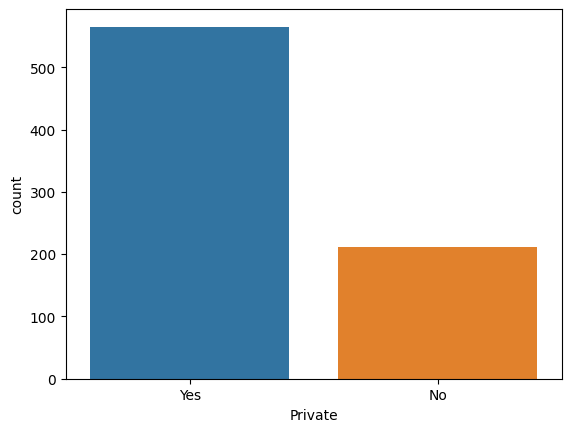

In [ ]:
sns.countplot(x='Private', data=df)

<ipython-input-7-1775da3a3a6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


<Axes: >

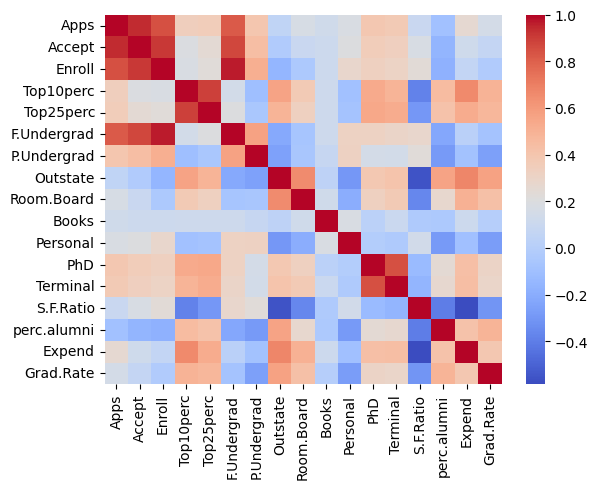

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm')

<Axes: xlabel='Private', ylabel='Outstate'>

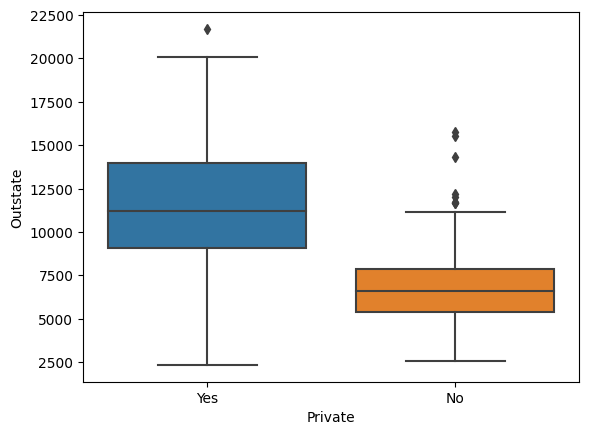

In [ ]:
sns.boxplot(x='Private', y='Outstate', data=df)

<Axes: xlabel='Private', ylabel='Apps'>

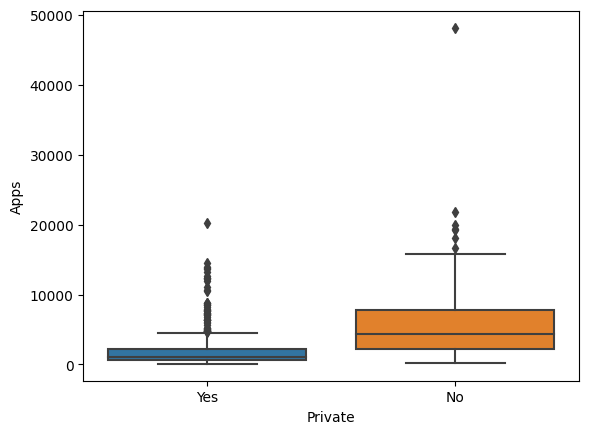

In [ ]:
sns.boxplot(x='Private', y='Apps', data=df)

<Axes: xlabel='Private', ylabel='Top10perc'>

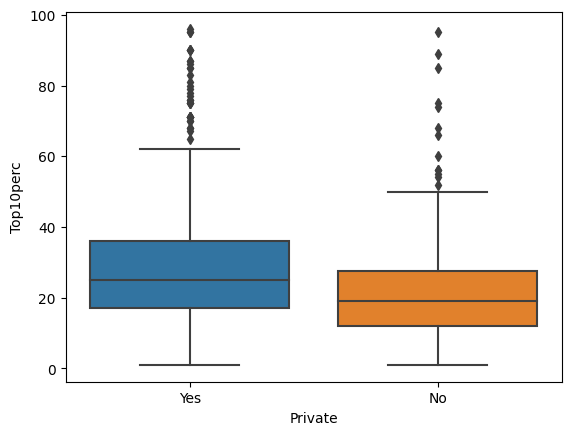

In [ ]:
sns.boxplot(x='Private', y='Top10perc', data=df)

<Axes: xlabel='Private', ylabel='Grad.Rate'>

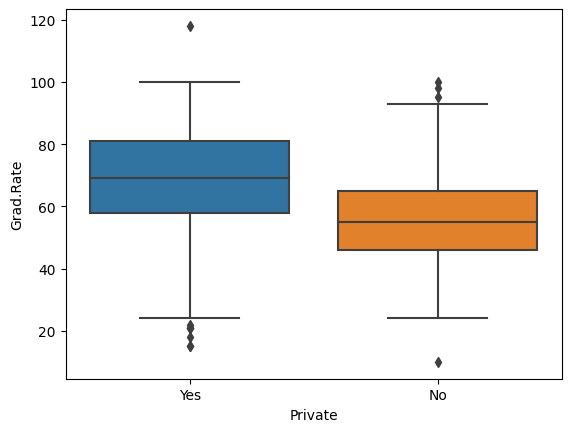

In [ ]:
sns.boxplot(x='Private', y='Grad.Rate', data=df)

# Plot Room.Board vs Grad.Rate


<Axes: xlabel='Room.Board', ylabel='Grad.Rate'>

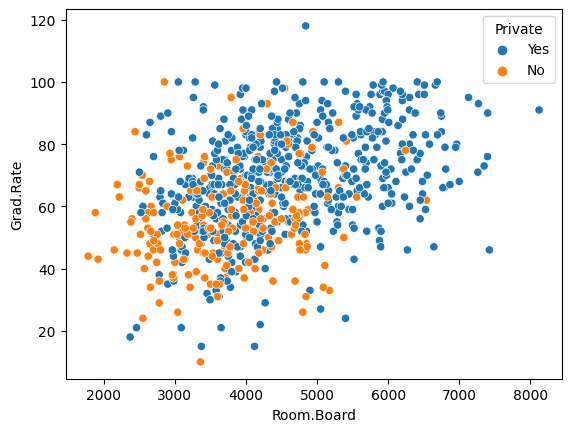

In [ ]:
sns.scatterplot(x='Room.Board', y='Grad.Rate', hue='Private', data=df)

# Plot Outstate vs F.Undergrad

<Axes: xlabel='Outstate', ylabel='F.Undergrad'>

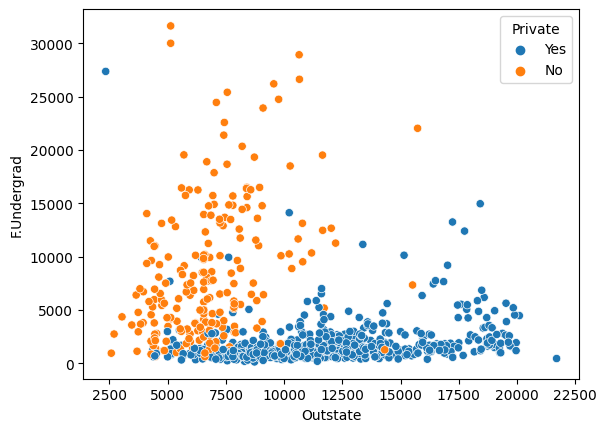

In [ ]:
sns.scatterplot(x='Outstate', y='F.Undergrad', hue='Private', data=df)

## We can see a number of outliers, we can do a number of things here like filter by interquartile range ands remove it, or remove extreme values using mean and standard deviation, or more advanced methods like Winsorization. In this case we use ICQ

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-14-a3b1a3480c80>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-14-a3b1a3480c80>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-14-a3b1a3480c80>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: xlabel='Room.Board', ylabel='Grad.Rate'>

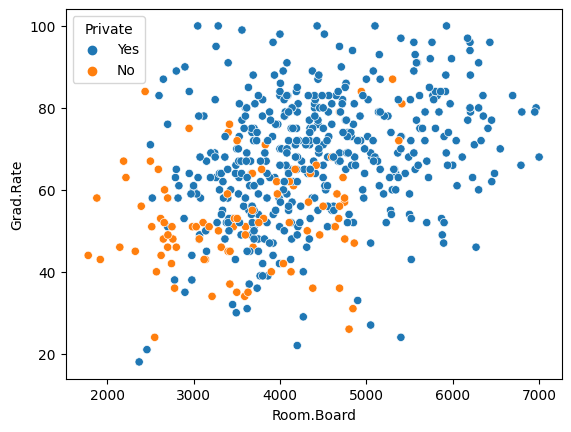

In [ ]:
sns.scatterplot(x='Room.Board', y='Grad.Rate', hue='Private', data=df)

<Axes: xlabel='Outstate', ylabel='F.Undergrad'>

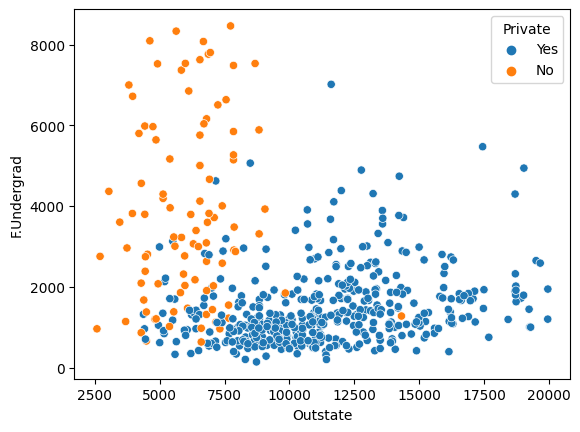

In [ ]:
sns.scatterplot(x='Outstate', y='F.Undergrad', hue='Private', data=df)

## K-Means

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
X = df.drop('Private', axis=1)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df.drop('Private', axis=1))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

## We can use PCA here before visualising, we are doing this already in Rajesh's module for this weeks lab too

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('Private', axis=1))

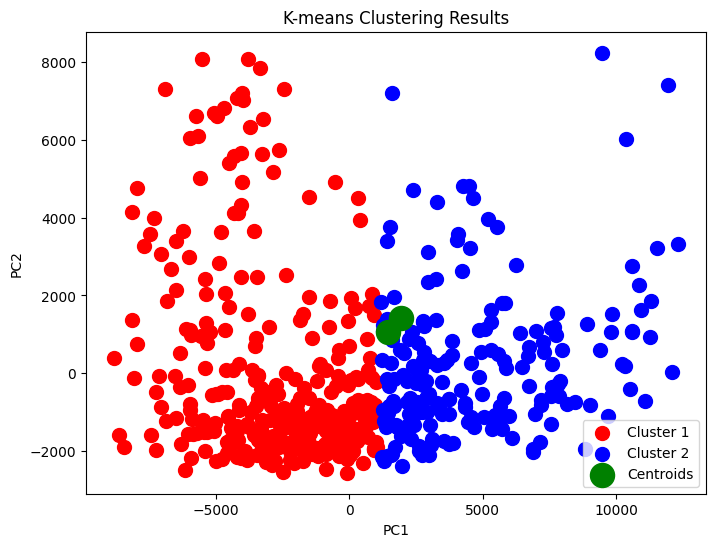

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[kmeans.labels_ == 0, 0], X_pca[kmeans.labels_ == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[kmeans.labels_ == 1, 0], X_pca[kmeans.labels_ == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='green', label='Centroids')
plt.title('K-means Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()